<a href="https://colab.research.google.com/github/descandon88/cvx-clc-data-analysis/blob/main/cvx_comunidad_analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> Mapa de comunidades nacionales CVX 
>Link de referencia: https://geopandas.org/en/stable/gallery/polygon_plotting_with_folium.html

>Link de lat y long: https://www.jasom.net/list-of-capital-cities-with-latitude-and-longitude/



In [1]:
#Instalación de librerías

!pip install geemap
!pip install geopandas
!pip install folium
!pip install mapclassify


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 7.7 MB/s 
     |████████████████████████████████| 8.8 MB 44.7 MB/s 
     |████████████████████████████████| 99 kB 11.6 MB/s 
     |████████████████████████████████| 46 kB 5.6 MB/s 
     |████████████████████████████████| 98 kB 10.0 MB/s 
     |████████████████████████████████| 1.2 MB 53.3 MB/s 
     |████████████████████████████████| 1.3 MB 47.8 MB/s 
     |████████████████████████████████| 130 kB 56.5 MB/s 
     |████████████████████████████████| 198 kB 57.1 MB/s 
     |████████████████████████████████| 3.0 MB 46.3 MB/s 
     |████████████████████████████████| 3.3 MB 36.2 MB/s 
     |████████████████████████████████| 128 kB 49.3 MB/s 
     |████████████████████████████████| 423 kB 43.6 MB/s 
     |████████████████████████████████| 344 kB 51.3 MB/s 
     |████████████████████████████████| 9.7 MB 31.5 MB/s 
     |██████████████████████████████

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 7.3 MB/s 
     |████████████████████████████████| 16.7 MB 29.1 MB/s 
     |████████████████████████████████| 6.3 MB 23.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import pandas as pd
##import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Importamos el paquete geopandas
import geopandas as gpd
from geopandas import GeoDataFrame
import json
#import pysal as ps
from fiona.crs import from_epsg
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap  

from fiona.crs import from_epsg
import matplotlib.colors as mcolors
import operator
from matplotlib.colors import ListedColormap  
from matplotlib import cm 

Se procede a subir la base de la CVX a google colab

In [7]:
from google.colab import files
uploaded = files.upload()
print('base subida')

Saving base_comunidades.csv to base_comunidades.csv
base subida


## Se elabora Dataframes de los países según su región/continente

###Dataframe de América (Norte, Sur y central)

In [4]:
df_sa = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas','Montevideo','Lima','Asunción','Quito','La Paz','Port-au-Prince'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela','Uruguay','Perú','Paraguay','Ecuador','Bolivia','Haiti'],
     'Latitude': [ -34.603684, -15.78, -33.45, 4.60, 10.48, -34.901113,-12.046374,-25.26374, -0.180653,-16.489689,18.594395], 
     'Longitude': [-58.381559, -47.91, -70.66, -74.08, -66.86,-56.164531,-77.042793,-57.575926,-78.467838,-68.119294,-72.307433],
     'Tipo de Comunidad':['Plena','Plena','Plena','Plena','Plena','Plena','Plena','Plena','Plena','Plena','Observadora'],
     'Miembros':[59,535,2680,88,43,508,426,143,88,65,0]}) 

df_all=pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas','Montevideo','Lima','Asunción','Quito','La Paz','Port-au-Prince','Quebec','Otawa', 'Washington', 'México DF'],
     'Country': ['Argentina', 'Brasil', 'Chile', 'Colombia', 'Venezuela','Uruguay','Perú','Paraguay','Ecuador','Bolivia','Haiti','Canada French', 'Canada English', 'United States', 'México'],
     'Latitude': [ -34.603684, -15.78, -33.45, 4.60, 10.48, -34.901113,-12.046374,-25.26374, -0.180653,-16.489689,18.594395,52.939916	, 45.42153, 38.907192, 19.432608], 
     'Longitude': [-58.381559, -47.91, -70.66, -74.08, -66.86,-56.164531,-77.042793,-57.575926,-78.467838,-68.119294,-72.307433,-73.549136, -75.697193, -77.036871, -99.133208],
     'Tipo de Comunidad':['Plena','Plena','Plena','Plena','Plena','Plena','Plena','Plena','Plena','Plena','Observadora','Plena','Plena','Plena','Plena'],
     'Miembros':[59,535,2680,88,43,508,426,143,88,65,0,60,185,725,195],
     'Equipo de Formación':['Con equipo','Con equipo','Con equipo','Con equipo','-','Con equipo','Con equipo','Con equipo','Sin equipo','Con equipo','-','Con equipo','Con equipo','Con equipo','Con equipo']}) 

df_na = pd.DataFrame(
    {'City': ['Quebec','Otawa', 'Washington', 'México DF'],
     'Country': ['Canada French', 'Canada English', 'Estados Unidos', 'México'],
     'Latitude': [ 46.8131, 45.42153, 38.907192, 19.432608], 
     'Longitude': [ 71.2075, -75.697193, -77.036871, -99.133208],
     'Tipo de Comunidad':['Plena','Plena','Plena','Plena'],
     'Miembros':[60,185,725,195]
     })




In [ ]:
df_all.info()

###Dataframe de Asia

In [14]:
df_asia=pd.DataFrame(
    {'City': ['Canberra','Seoul','Manila','Hong Kong','New Delhi','Jakarta','Tokyo','Sri Jayawardenepura Kotte','Taipei','Hanoi','Macau','Wellington','Singapore'],
     'Country': ['Australia', 'South Korea', 'Philippines', 'Hong Kong', 'India','Indonesia','Japan','Sri Lanka','Taiwan','Vietnam','Macau','New Zealand','Singapore'],
     'Latitude': [ -35.282,37.566535,14.599512,22.396428,28.613939,-6.208763,35.709026,6.89407,25.032969,21.027764,22.166667,-41.28646,1.280095],  
     'Longitude': [ 149.128684, 126.977969,120.98422,114.109497,77.209021,106.845599, 139.731992,79.902478,121.565418,105.83416,113.55,174.776236,103.850949], 
     'Tipo de Comunidad':['Plena','Plena','Plena','Plena','Plena','Plena','Plena','Plena','Plena','Plena','Observadora','Observadora','Observadora'],
     'Miembros':[260,135,2443,215,440,76,220,268,150,185,0,0,0],
     'Equipo de Formación':['Sin equipo','Con equipo','Con equipo','Con equipo','-','Sin equipo','Sin Equipo','Sin equipo','Con equipo','Con equipo','Sin equipo','-','Con equipo']
     })

###Dataframe de Europa

In [8]:
df_eu= pd.DataFrame(
    {'City': ['Berlin','Vienna', 'Leuven', 'Brussels','Zagreb','Ljubljana','Madrid','Paris','Budapest','London','Dublin','Rome','Riga','Vilnius','Luxembourg','Valletta','Amsterdam','Warsaw','Lisbon','Bern','Bratislava','Stockholm'], 
     'Country': ['Germany', 'Austria','Flemish Belgium', 'French Belgium','Croatia','Slovenia','Spain','France','Hungary','UK','Ireland','Italy','Latvia','Lithuania','Luxembourg','Malta','Netherlands','Poland','Portugal','Switzerland','Slovakia','Sweden'],
     'Latitude': [ 52.520007, 48.208174, 50.8823,50.8476,45.815011,46.056947,40.416775,48.856614,47.497912,51.507351 ,53.349805,41.902784,56.949649,54.687156,49.611621,35.898909 ,52.370216,52.229676,38.722252,46.947974,48.145892,59.329323], 
     'Longitude': [13.404954, 16.373819, 4.7138,4.3572,15.981919,14.505751,-3.70379,2.352222,19.040235,-0.127758,-6.26031,12.496366,24.105186,25.279651,6.131935,14.514553,4.895168,21.012229,-9.139337,7.447447,17.107137,18.068581],
     'Tipo de Comunidad':['Plena','Plena','Plena','Plena','Plena','Plena','Plena','Plena','Plena','Plena','Plena','Plena','Plena','Plena','Plena','Plena','Plena','Plena','Plena','Plena','Observadora','Observadora'],
     'Miembros':[950,119,150,320,30,96,1023,6773,73,230,62,800,57,232,80,165,66,500,1200,50,0,0],
     'Equipo de Formación':['Con equipo','Con equipo','No','Con equipo','-','-','Con equipo','Con equipo','-','Con equipo','No','No','-','Con equipo','Con equipo','No','No','No','-','No','No','Con equipo']
     })

###Dataframe de Africa

In [ ]:
###de_afr=pd.DataFrame({})

####Se elabora un plot del mapa del mundo

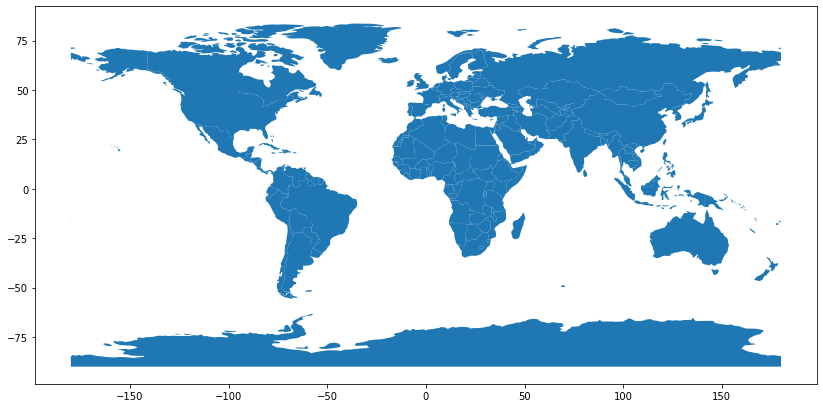

In [9]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(figsize=(14,10))

In [10]:
df1 = pd.read_csv('base_comunidades.csv')
df1 = df1.rename(columns={'equipo_formacion': 'Equipo de Formación', 'tipo_comunidad': 'Tipo de Comunidad','country':'Country','members':'Miembros'})
df1.head(5)

,region,Country,Miembros,Equipo de Formación,Tipo de Comunidad,Unnamed: 5,Unnamed: 6
0,Europe,Germany,950.0,YES,plena,NaN,NaN
1,Latin America,Argentina,59.0,YES,plena,NaN,2.0
2,Asia Pacific,Australia,260.0,NO,plena,NaN,3.0
3,Europe,Austria,119.0,YES,plena,NaN,NaN
4,Europe,Belgium Flemish Region,150.0,NO,plena,NaN,NaN


In [11]:
#Preparo la base de países
wd=world.copy()
wd = wd.rename(columns={'name': 'Country', 'iso_a3': 'Abreviación'})
wd=wd.drop(columns=['pop_est', 'gdp_md_est']).copy()
wd.tail()
wd.replace(to_replace= 'Ecuador', value = 'Ecuador', inplace=True )
wd.replace(to_replace= 'Colombia', value = 'Colombia', inplace=True )
wd['Country'].unique()
# no está Hong Kong, Macau

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

In [12]:


#wd['geometry'].unique()
df1['Miembros'] = df1['Miembros'].fillna(0)
df1['Equipo de Formación'] = df1['Equipo de Formación'].fillna('-')
df1.replace(to_replace= 'Ecuador', value = 'Ecuador', inplace=True )
df1.replace(to_replace= 'Colombia', value = 'Colombia', inplace=True )

#se agregan los siguientes países a la base:  mauricios, Beligum french, belgium flemish, Canada French, Canada English
df3 = wd.merge(df1, how='inner', on='Country')
df3['Miembros']=df3['Miembros'].astype(np.int64)

df3.info(30)
df3['Country'].unique()



<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 69 entries, 0 to 68
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   continent            69 non-null     object  
 1   Country              69 non-null     object  
 2   Abreviación          69 non-null     object  
 3   geometry             69 non-null     geometry
 4   region               69 non-null     object  
 5   Miembros             69 non-null     int64   
 6   Equipo de Formación  69 non-null     object  
 7   Tipo de Comunidad    69 non-null     object  
 8   Unnamed: 5           0 non-null      float64 
 9   Unnamed: 6           33 non-null     float64 
dtypes: float64(2), geometry(1), int64(1), object(6)
memory usage: 5.9+ KB


array(['Canada', 'United States of America', 'Indonesia', 'Argentina',
       'Chile', 'Dem. Rep. Congo', 'Kenya', 'Chad', 'Haiti',
       'Dominican Rep.', 'South Africa', 'Lesotho', 'Mexico', 'Uruguay',
       'Brazil', 'Bolivia', 'Peru', 'Colombia', 'Nicaragua',
       'El Salvador', 'Guatemala', 'Venezuela', 'France', 'Ecuador',
       'Puerto Rico', 'Cuba', 'Zimbabwe', 'Botswana', 'Benin', 'Niger',
       'Cameroon', 'Congo', 'Zambia', 'Lebanon', 'Madagascar', 'Vietnam',
       'South Korea', 'India', 'Syria', 'Sweden', 'Poland', 'Austria',
       'Hungary', 'Lithuania', 'Latvia', 'Germany', 'Croatia',
       'Switzerland', 'Luxembourg', 'Belgium', 'Netherlands', 'Portugal',
       'Spain', 'Ireland', 'New Zealand', 'Australia', 'Sri Lanka',
       'Taiwan', 'Italy', 'United Kingdom', 'Philippines', 'Slovenia',
       'Slovakia', 'Japan', 'Paraguay', 'Egypt', 'Ethiopia', 'Rwanda',
       'S. Sudan'], dtype=object)

In [ ]:
#Arreglamos la base para realizar un merge
#append row to the dataframe
row_fle_reg={'continent':'Europe','name':'Belgium Flemish Region'}
row_fre_reg={ 'continent':'Europe', 'name':'Belgium French Region'}
row_canfrench={'continent':'North America','name':'Canada French'}
row_canengl={'continent':'North America','name':'Canada English'}
row_mauritius={'continent':'Oceania','name':'Mauritius Is.'}

#Uno las filas creadas al dataframe de países
#df_example = df_example.append(new_row, ignore_index=True)
wd = wd.append([row_fle_reg,row_fre_reg,row_canfrench,row_canengl,row_mauritius],ignore_index=True).copy()

wd['name'].unique()

###Transformo los dataframes de países en formato GeoDataframe

In [15]:
gdf_sa = gpd.GeoDataFrame(df_sa, geometry=gpd.points_from_xy(df_sa.Longitude, df_sa.Latitude))
gdf_na = gpd.GeoDataFrame(df_na, geometry=gpd.points_from_xy(df_na.Longitude, df_na.Latitude))
gdf_all= gpd.GeoDataFrame(df_all, geometry=gpd.points_from_xy(df_all.Longitude, df_all.Latitude))
gdf_asia= gpd.GeoDataFrame(df_asia, geometry=gpd.points_from_xy(df_asia.Longitude, df_asia.Latitude))
gdf_eu= gpd.GeoDataFrame(df_eu, geometry=gpd.points_from_xy(df_eu.Longitude, df_eu.Latitude))


### Plot del mapa

In [16]:
import folium
import geopandas
import mapclassify

m = df3.explore(
     column="Miembros",  # make choropleth based on "BoroName" column
     scheme="naturalbreaks",  # use mapclassify's natural breaks scheme
     legend=True, # show legend
     k=10, # use 10 bins
     legend_kwds=dict(colorbar=False), # do not use colorbar
     tooltip=['Miembros'], # show "name" column in the tooltip

      tooltip_kwds=dict(labels=False),
     name="countries" # name of the layer in the map
)

gdf_all.explore(
    
     m=m, # pass the map object
     color="red", # use red color on all points
     marker_kwds=dict(radius= 5, fill=True), # make marker radius 10px with fill
     #style_kwds=dict(color=red,weight= ),
     tooltip=["Country",'Tipo de Comunidad','Miembros','Equipo de Formación'], # show "name" column in the tooltip
     tooltip_kwds=dict(labels=True), # do not show column label in the tooltip
     name="Locaciones America Latina" # name of the layer in the map
)

gdf_asia.explore(
    
     m=m, # pass the map object
     color="orange", # use red color on all points
     marker_kwds=dict(radius= 5, fill=True), # make marker radius 10px with fill
     #style_kwds=dict(color=red,weight= ),
     tooltip=["Country",'Tipo de Comunidad','Miembros','Equipo de Formación'], # show "name" column in the tooltip
     tooltip_kwds=dict(labels=True), # do not show column label in the tooltip
     name="Locaciones Asia Pacífico" # name of the layer in the map
)

gdf_eu.explore(
    
     m=m, # pass the map object
     color="blue", # use red color on all points
     marker_kwds=dict(radius= 5, fill=True), # make marker radius 10px with fill
     #style_kwds=dict(color=red,weight= ),
     tooltip=["Country",'Tipo de Comunidad','Miembros','Equipo de Formación'], # show "name" column in the tooltip
     tooltip_kwds=dict(labels=True), # do not show column label in the tooltip
     name="Locaciones Europa" # name of the layer in the map
)

folium.TileLayer('Stamen Toner', control=True).add_to(m)  # use folium to add alternative tiles
folium.LayerControl().add_to(m)  # use folium to add layer control

m  # show map

In [ ]:
# Mapa de sudamerica
ax = world[world.continent == 'South America'].plot(
    color='silver', edgecolor='black',figsize=(14,10))

# Plot en ``GeoDataFrame``.
gdf_sa.plot(ax=ax, color='red')

plt.show()


In [ ]:
# Mapa de Norteamerica
ax = world[world.continent == 'North America'].plot(
    color='silver', edgecolor='black',figsize=(10,14))

# Plot en ``GeoDataFrame``.
gdf_na.plot(ax=ax, color='red')

plt.show()

In [ ]:
# Mapa de todo el mundo
ax = world.plot(
    color='silver', edgecolor='black',figsize=(15,16))

# Plot en ``GeoDataFrame``.
gdf_na.plot(ax=ax, color='red')

plt.show()

In [ ]:
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
cities.head()

> Interesante: https://geopandas.org/en/stable/gallery/choro_legends.html
